In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_parquet("data.parquet")

In [26]:
data

,WfeRms,SegmentPiston,DetectorFrame
0,[1.2165695579824387e-06],"[-2.590452368167462e-06, -1.1498302683321526e-...","[1792676.8, 2980098.5, 1459757.8, 118873.26, 8..."
1,[1.2122628731958685e-06],"[-2.592427563286037e-06, -1.1534721124917269e-...","[1847692.0, 4121763.2, 3001749.5, 831933.7, 12..."
2,[1.2080507758582826e-06],"[-2.5956735498766648e-06, -1.1576863698792295e...","[1931901.5, 5108629.0, 4198000.5, 1059777.2, 1..."
3,[1.2041535910611856e-06],"[-2.599956133053638e-06, -1.1625986644503428e-...","[2257075.5, 5163784.0, 4287039.0, 1607167.0, 1..."
4,[1.2007240002276376e-06],"[-2.605289182611159e-06, -1.1685394838423235e-...","[3169613.5, 5679427.5, 4926777.5, 2060194.4, 2..."
5,[1.1974030940109515e-06],"[-2.610756610010867e-06, -1.1755550985981245e-...","[5647514.0, 6443635.5, 5558178.5, 3654044.5, 3..."
6,[1.1943646995860036e-06],"[-2.6159668777836487e-06, -1.1834919177999836e...","[6395876.5, 6909845.0, 6216870.0, 5322101.0, 4..."
7,[1.1917130677829846e-06],"[-2.6207067094219383e-06, -1.192594595522678e-...","[6734284.0, 6978776.0, 6762409.5, 6726920.0, 5..."
8,[1.1895224361069268e-06],"[-2.6254854219587287e-06, -1.2025769819956622e...","[6958153.5, 7215359.0, 6893282.0, 6777884.0, 5..."
9,[1.1879144494741922e-06],"[-2.630717972351704e-06, -1.2130652748965076e-...","[8204061.5, 7712631.0, 7108252.5, 6906352.0, 5..."


In [31]:
data['DetectorFrame'][199].shape

(262144,)

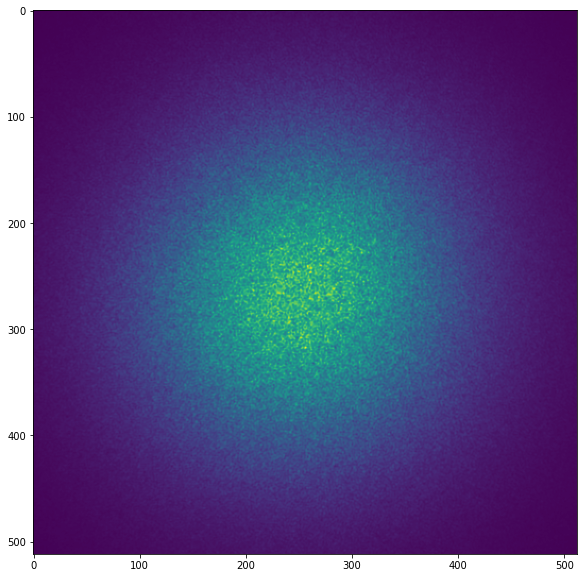

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(data['DetectorFrame'][199].reshape(512,-1))
